<a href="https://colab.research.google.com/github/Prince11jain/NYC-Taxi-Trip-Time-Prediction/blob/main/final_Sami_Prince_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [63]:
# The rituals! Here we are invited some libraries which are useful in future operatins.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import datetime as dt
from math import radians, cos, sin, asin, sqrt
from datetime import datetime, timedelta
from math import radians, cos, sin, asin, sqrt
from pandas.tseries.holiday import USFederalHolidayCalendar  
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

In [64]:
# We have to mount our drive so that data can be readable.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import Dataset**

In [65]:
# Loading the csv file containing data
df=pd.read_csv('/content/drive/MyDrive/NYC Taxi Data.csv')

# **Data Exploration**

We will explore the data and modify dataset as per the our requirment for the further analysis of the problem.

In [66]:
# This provide the basic information about data and there type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [67]:
# from describe we are able to see our data in the tabular form which provide insides of data .
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [68]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [69]:
# data cleaning 
df[df.isna().any(axis=1)] # getting rid of null values
index = df[ (df['passenger_count'] == 7) | (df['passenger_count'] == 8) | (df['passenger_count'] == 9) | (df['passenger_count'] == 0)].index
df.drop(index , inplace=True) # getting rid of outliers in passenger count

In [70]:
# Data Formatting
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map(lambda x: 0 if x == 'N' else 1)

In [71]:
# Remove outliers
mean = np.mean(df['trip_duration'])
print("Mean for Trip Duration is:", mean)

standard_deviation = np.std(df['trip_duration'])
print("Standard Deviation for Trip Duration is:", standard_deviation)

df = df[df['trip_duration'].between(mean - 2*standard_deviation, mean + 2*standard_deviation, inclusive = True)]
df.describe()

Mean for Trip Duration is: 959.4638466617166
Standard Deviation for Trip Duration is: 5237.070712268078


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1.456476e+06,1.456476e+06,1.456476e+06,1.456476e+06,1.456476e+06,1.456476e+06,1.456476e+06,1.456476e+06
mean,1.534292e+00,1.663988e+00,-7.397349e+01,4.075093e+01,-7.397342e+01,4.075180e+01,5.521547e-03,8.368821e+02
std,4.988229e-01,1.313550e+00,7.091133e-02,3.286441e-02,7.067376e-02,3.588713e-02,7.410171e-02,6.589201e+02
min,1.000000e+00,1.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073736e+01,-7.399133e+01,4.073589e+01,0.000000e+00,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01,0.000000e+00,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,0.000000e+00,1.073000e+03
max,2.000000e+00,6.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,1.000000e+00,1.141100e+04


In [72]:
(df['trip_duration'] < 30).value_counts()

False    1451732
True        4744
Name: trip_duration, dtype: int64

In [73]:
# Getting rid off trip time less than 30 seconds
index = df[ (df['trip_duration'] < 30)].index
df.drop(index , inplace=True)

# **Data Preprocessing**

In [74]:
#Let`s see places were booked the most using our maps
import folium
f = folium.Figure(width=1500, height=500)
mapa = folium.Map(location = (40.7679, -73.9822), zoom_start=11).add_to(f)

for index, row in df.sample(1000).iterrows():
    folium.Marker([row["pickup_latitude"], row["pickup_longitude"]], icon=folium.Icon(color="purple")).add_to(mapa)
    folium.Marker([row["dropoff_latitude"], row["dropoff_longitude"]], icon=folium.Icon(color="red")).add_to(mapa)
display(mapa)

But, we are unable to get any insights or draw conclusions from that. So,we will extract the variable from this is -> "distance" and "speed".

# Euclidean Distance
## Euclidean distance is calculated as the hypotenuse of a right triangle, just like in the Pythagorean theorem. This is simply a direct path from point A to point B. In the image below, this would be the black line. The euclidean distance is roughly 1,417 miles. Although not perfect, this may be a good estimate for flight distance.

# The Haversine (or great circle)
## Thedistance is the angular distance between two points on the surface of a sphere. The first coordinate of each point is assumed to be the latitude, the second is the longitude, given in radians.

# BEARING AND DISTANCES.
## Bearing can be defined as the clockwise angular movement between two distant places

# Manhattan Distance
## The distance between two points measured along axes at right angles. In a plane with p1 at (x1, y1) and p2 at (x2, y2), it is |x1 - x2| + |y1 - y2|. This method has its problems but could be a good estimate in grid-based cities.



In [75]:
# 1 Haversine Distance
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371 
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

# 2 Bearing Distance 
def bearing_direction(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

# 3 Manhattan Distance
def manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b

In [76]:
df.loc[:, 'direction'] = bearing_direction(df['pickup_latitude'].values, df['pickup_longitude'].values, df['dropoff_latitude'].values, df['dropoff_longitude'].values)
df.loc[:, 'distance_haversine'] = haversine_distance(df['pickup_latitude'].values, df['pickup_longitude'].values, df['dropoff_latitude'].values, df['dropoff_longitude'].values)
df.loc[:, 'distance_manhattan'] = manhattan_distance(df['pickup_latitude'].values, df['pickup_longitude'].values, df['dropoff_latitude'].values, df['dropoff_longitude'].values)


In [77]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,direction,distance_haversine,distance_manhattan
count,1.451732e+06,1.451732e+06,1.451732e+06,1.451732e+06,1.451732e+06,1.451732e+06,1.451732e+06,1.451732e+06,1.451732e+06,1.451732e+06,1.451732e+06
mean,1.534840e+00,1.665022e+00,-7.397359e+01,4.075097e+01,-7.397352e+01,4.075185e+01,5.476217e-03,8.395735e+02,-1.572364e+01,3.450661e+00,4.459449e+00
std,4.987848e-01,1.314441e+00,7.078508e-02,3.272571e-02,7.054620e-02,3.576827e-02,7.379859e-02,6.583086e+02,1.045346e+02,4.294072e+00,5.662150e+00
min,1.000000e+00,1.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,0.000000e+00,3.000000e+01,-1.799927e+02,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073740e+01,-7.399133e+01,4.073594e+01,0.000000e+00,3.990000e+02,-1.254570e+02,1.238891e+00,1.580035e+00
50%,2.000000e+00,1.000000e+00,-7.398176e+01,4.075414e+01,-7.397977e+01,4.075455e+01,0.000000e+00,6.640000e+02,8.337353e+00,2.100674e+00,2.697638e+00
75%,2.000000e+00,2.000000e+00,-7.396740e+01,4.076837e+01,-7.396308e+01,4.076983e+01,0.000000e+00,1.075000e+03,5.341448e+01,3.884518e+00,5.010806e+00
max,2.000000e+00,6.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,1.000000e+00,1.141100e+04,1.800000e+02,1.240909e+03,1.318480e+03


In [78]:
(df['distance_haversine'] == 0).value_counts()

False    1447176
True        4556
Name: distance_haversine, dtype: int64

In [79]:
(df['distance_manhattan'] == 0).value_counts()

False    1447176
True        4556
Name: distance_manhattan, dtype: int64

In [80]:
# Outlier analysis
mean = np.mean(df['distance_manhattan'])
print("Mean for distance haversine is:", mean)

standard_deviation = np.std(df['distance_manhattan'])
print("Standard Deviation for distance haversine is:", standard_deviation)

Mean for distance haversine is: 4.459448784324908
Standard Deviation for distance haversine is: 5.6621476162218665


In [81]:
# Outlier analysis
mean = np.mean(df['distance_haversine'])
print("Mean for distance haversine is:", mean)

standard_deviation = np.std(df['distance_haversine'])
print("Standard Deviation for distance haversine is:", standard_deviation)

df = df[df['distance_haversine'].between(0, mean + 3*standard_deviation, inclusive = False)]
df.describe()

Mean for distance haversine is: 3.450660502542479
Standard Deviation for distance haversine is: 4.29407012578421


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,direction,distance_haversine,distance_manhattan
count,1.407184e+06,1.407184e+06,1.407184e+06,1.407184e+06,1.407184e+06,1.407184e+06,1.407184e+06,1.407184e+06,1.407184e+06,1.407184e+06,1.407184e+06
mean,1.533502e+00,1.662566e+00,-7.397667e+01,4.075267e+01,-7.397500e+01,4.075279e+01,5.166346e-03,7.859105e+02,-1.621687e+01,2.973801e+00,3.806503e+00
std,4.988765e-01,1.313473e+00,6.441952e-02,2.552995e-02,6.422631e-02,3.041796e-02,7.169141e-02,5.569156e+02,1.050582e+02,2.695646e+00,3.442586e+00
min,1.000000e+00,1.000000e+00,-1.219333e+02,3.531031e+01,-1.219333e+02,3.517355e+01,0.000000e+00,3.000000e+01,-1.799927e+02,4.241750e-04,4.241750e-04
25%,1.000000e+00,1.000000e+00,-7.399207e+01,4.073844e+01,-7.399138e+01,4.073693e+01,0.000000e+00,3.930000e+02,-1.281824e+02,1.225836e+00,1.563345e+00
50%,2.000000e+00,1.000000e+00,-7.398201e+01,4.075474e+01,-7.397994e+01,4.075490e+01,0.000000e+00,6.470000e+02,9.767930e+00,2.047145e+00,2.629657e+00
75%,2.000000e+00,2.000000e+00,-7.396830e+01,4.076867e+01,-7.396374e+01,4.077003e+01,0.000000e+00,1.028000e+03,5.305965e+01,3.650825e+00,4.709773e+00
max,2.000000e+00,6.000000e+00,-7.207433e+01,4.169680e+01,-7.202241e+01,4.169335e+01,1.000000e+00,1.141100e+04,1.800000e+02,1.633267e+01,2.308788e+01


In [82]:
(df['distance_haversine'] == 0).value_counts()

False    1407184
Name: distance_haversine, dtype: int64

In [83]:
(df['distance_manhattan'] == 0).value_counts()

False    1407184
Name: distance_manhattan, dtype: int64

In [84]:
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

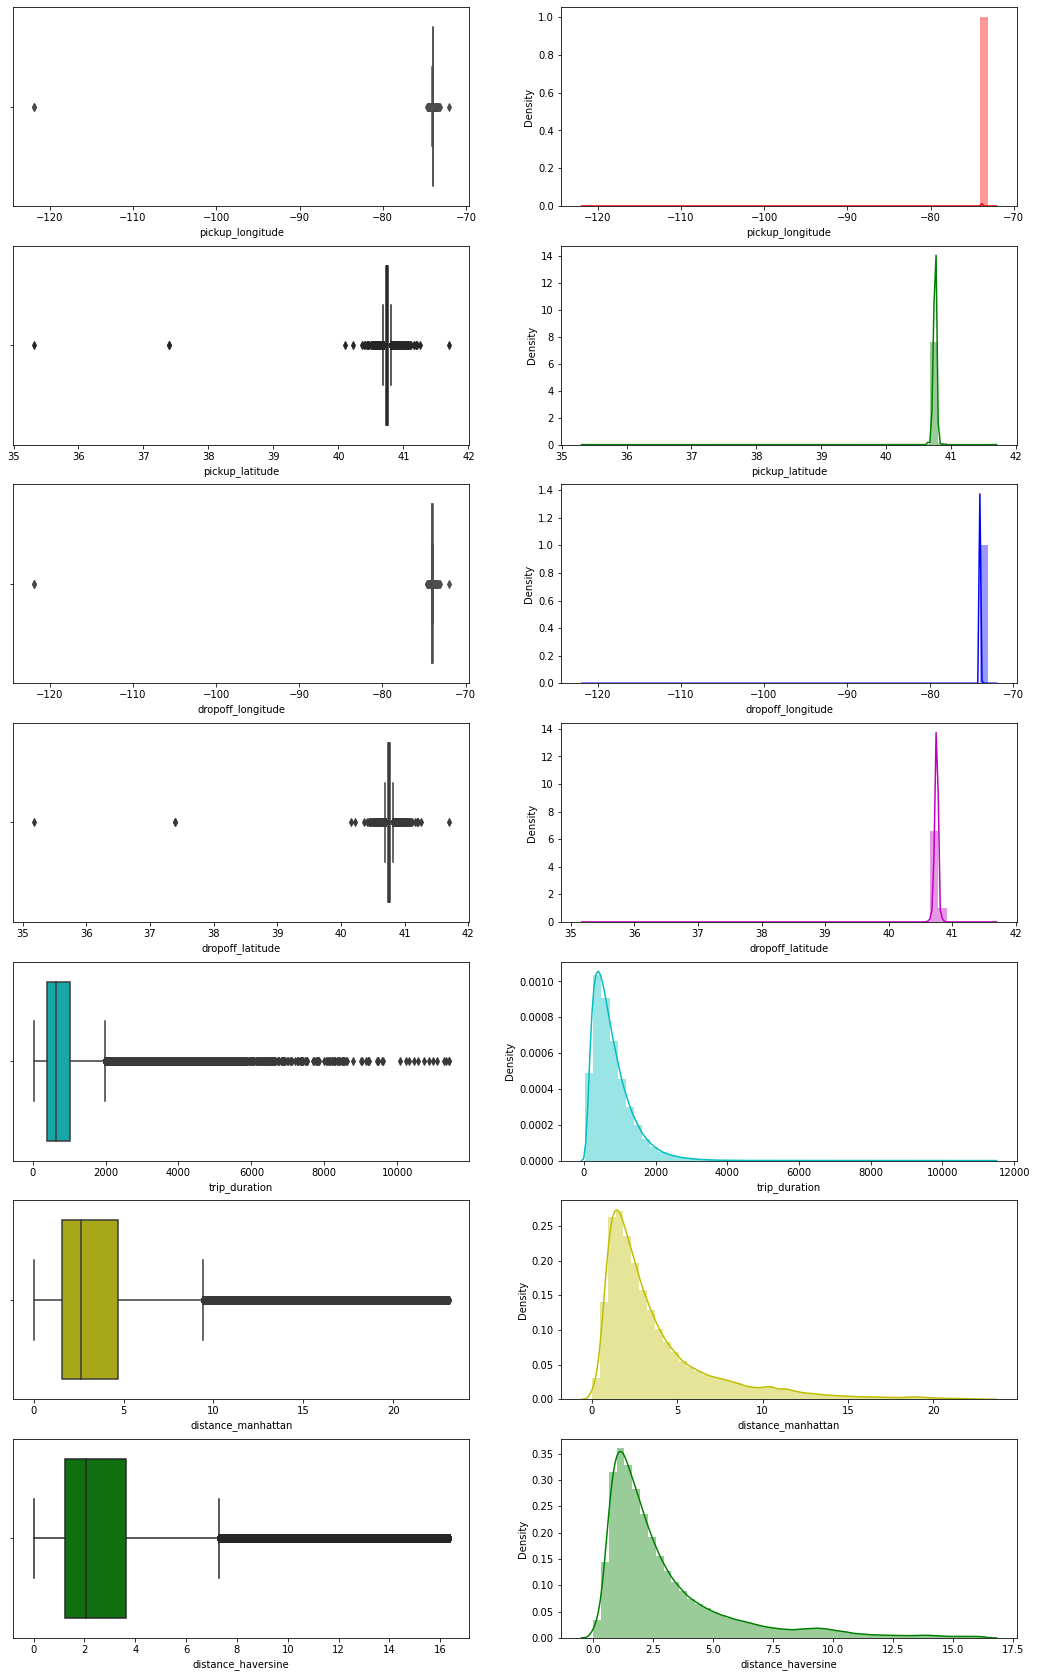

In [85]:
numeric_data = pd.DataFrame(df[[
                                        'pickup_longitude',	
                                        'pickup_latitude',	
                                        'dropoff_longitude',	
                                        'dropoff_latitude',	
                                        'trip_duration',	
                                        'distance_manhattan',
                                        'distance_haversine'
                                        ]])

f, axes = plt.subplots(7, 2, figsize=(18, 30))
colors = ["r", "g", "b", "m", "c","y","g"]

count = 0
for var in numeric_data:
    sns.boxplot(numeric_data[var], orient = "h", color = colors[count], ax = axes[count,0])
    sns.distplot(numeric_data[var], color = colors[count], ax = axes[count,1])
    count += 1

**Observation:**

There are some trips with over 100 km distance and some trips with 0 km distance.

The possible reasons for zero km trips can be:

The dropoff location couldn’t be tracked.
The passengers or driver cancelled the trip due to some or issue technical issue in software, etc.

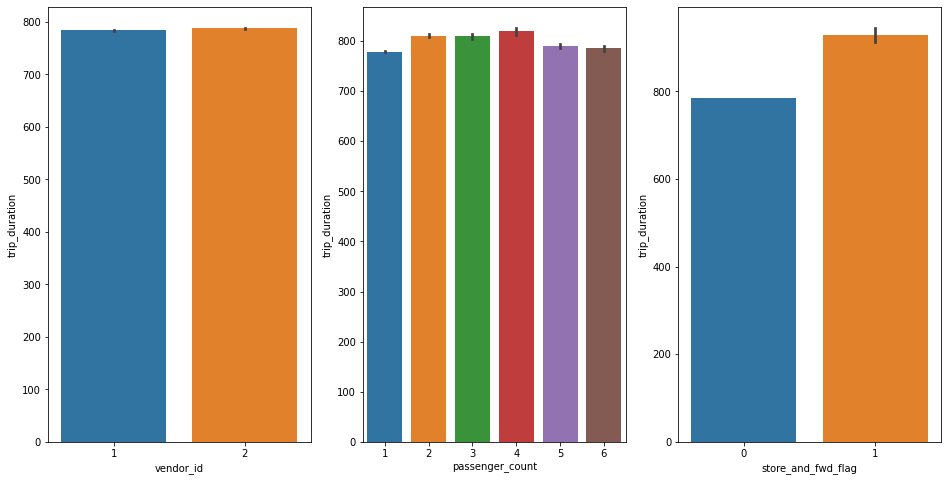

In [86]:
# Categorical Variables: Visualising using Violin Plots
# vendor_id, passenger_count, store_and_fwd_flag
f, axes = plt.subplots(1, 3, figsize=(16,8))

sns.barplot(x = 'vendor_id', y = 'trip_duration', data = df, ax= axes[0])
sns.barplot(x = 'passenger_count', y = 'trip_duration', data = df, ax= axes[1])
sns.barplot(x = 'store_and_fwd_flag', y = 'trip_duration', data = df, ax= axes[2])

In [87]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,direction,distance_haversine,distance_manhattan
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,99.970196,1.498521,1.735433
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,-117.153768,1.805507,2.430506
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,-159.680165,6.385098,8.203575
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,-172.737700,1.485498,1.661331
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,179.473585,1.188588,1.199457


In [88]:
from geopy.geocoders import Nominatim
df['geom_pickup'] = df.apply(lambda row: (str(round(row.pickup_latitude,2)),str(round(row.pickup_longitude,2))),axis=1)
df['geom_dropoff'] = df.apply(lambda row: (str(round(row.dropoff_latitude,2)),str(round(row.dropoff_longitude,2))),axis=1)

In [89]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,direction,distance_haversine,distance_manhattan,geom_pickup,geom_dropoff
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,99.970196,1.498521,1.735433,"(40.77, -73.98)","(40.77, -73.96)"
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,-117.153768,1.805507,2.430506,"(40.74, -73.98)","(40.73, -74.0)"
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,-159.680165,6.385098,8.203575,"(40.76, -73.98)","(40.71, -74.01)"
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,-172.737700,1.485498,1.661331,"(40.72, -74.01)","(40.71, -74.01)"
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,179.473585,1.188588,1.199457,"(40.79, -73.97)","(40.78, -73.97)"


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407184 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1407184 non-null  object 
 1   vendor_id           1407184 non-null  int64  
 2   pickup_datetime     1407184 non-null  object 
 3   dropoff_datetime    1407184 non-null  object 
 4   passenger_count     1407184 non-null  int64  
 5   pickup_longitude    1407184 non-null  float64
 6   pickup_latitude     1407184 non-null  float64
 7   dropoff_longitude   1407184 non-null  float64
 8   dropoff_latitude    1407184 non-null  float64
 9   store_and_fwd_flag  1407184 non-null  int64  
 10  trip_duration       1407184 non-null  int64  
 11  direction           1407184 non-null  float64
 12  distance_haversine  1407184 non-null  float64
 13  distance_manhattan  1407184 non-null  float64
 14  geom_pickup         1407184 non-null  object 
 15  geom_dropoff   

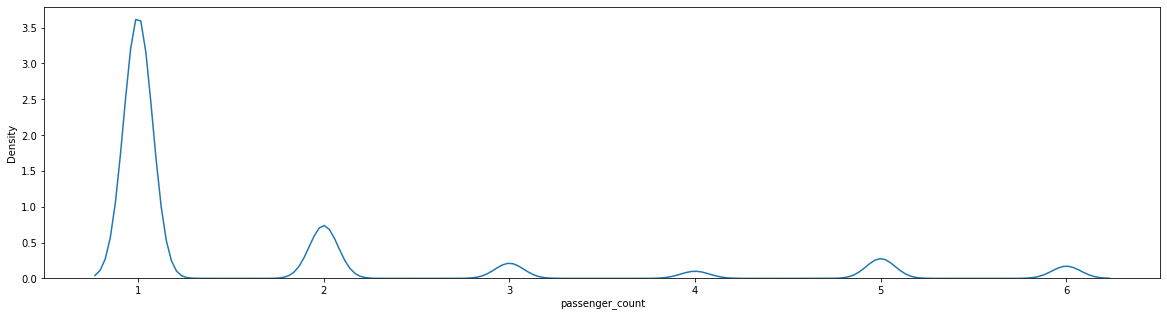

In [91]:
# Lets draw a line chart for passenger count 
plt.figure(figsize = (20,5))
sns.kdeplot(df.passenger_count)
plt.show()

**Observation:**

As per above observations, it is to be noted that highest amount of trips were taken by a single passenger and large group of people travelling together is rare compared to single passenger.

In [92]:
df.geom_pickup.nunique()

779

In [93]:
df.geom_dropoff.nunique()

1247

In [94]:
temp_Ar=[]
temparr2=[]
temp_Ar=df.geom_pickup.unique()
temparr2=df.geom_dropoff.unique()


In [95]:
joined_templst= [*temp_Ar,*temparr2]

In [96]:
joined_templst=list(set(joined_templst))
len(joined_templst)

1306

In [97]:
new_df=pd.DataFrame(joined_templst, columns = ['Latitude','Longitude'] )

In [98]:
new_df.shape

(1306, 2)

In [99]:
# new_df['geom'] = new_df.apply(lambda row: (str(row.Latitude),str(row.Longitude)),axis=1)

In [100]:
new_df.head()

,Latitude,Longitude
0,40.61,-73.96
1,40.81,-73.85
2,40.74,-73.64
3,40.65,-74.12
4,40.67,-73.73


In [101]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Latitude   1306 non-null   object
 1   Longitude  1306 non-null   object
dtypes: object(2)
memory usage: 20.5+ KB


In [102]:
new_df=pd.read_csv('/content/drive/MyDrive/NYC Taxi Data - 3.csv')

In [103]:
new_df.head()

,Latitude,Longitude,city,state,country
0,40.86,-73.86,City of New York,New York,United States
1,40.56,-74.00,City of New York,New York,United States
2,40.59,-73.65,Nassau County,New York,United States
3,40.72,-73.87,City of New York,New York,United States
4,40.92,-73.86,City of Yonkers,New York,United States


Here are combine the latitude and longitude and obtain the city name which provide the information that are user friendly and understandable for non data person also.

In [104]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   1304 non-null   float64
 1   Longitude  1304 non-null   float64
 2   city       1304 non-null   object 
 3   state      1304 non-null   object 
 4   country    1304 non-null   object 
dtypes: float64(2), object(3)
memory usage: 51.1+ KB


In [105]:
new_df['geom_pickup'] = new_df.apply(lambda row: (str(round(row.Latitude,2)),str(round(row.Longitude,2))),axis=1)

In [106]:
new_df.head()

,Latitude,Longitude,city,state,country,geom_pickup
0,40.86,-73.86,City of New York,New York,United States,"(40.86, -73.86)"
1,40.56,-74.00,City of New York,New York,United States,"(40.56, -74.0)"
2,40.59,-73.65,Nassau County,New York,United States,"(40.59, -73.65)"
3,40.72,-73.87,City of New York,New York,United States,"(40.72, -73.87)"
4,40.92,-73.86,City of Yonkers,New York,United States,"(40.92, -73.86)"


In [107]:
new_df.drop(['Latitude',],axis=1,inplace=True)

In [108]:
new_df.drop(['Longitude'],axis=1,inplace=True)

In [109]:
new_df.drop(['state','country'],axis=1,inplace=True)

In [110]:
new_df.head()

,city,geom_pickup
0,City of New York,"(40.86, -73.86)"
1,City of New York,"(40.56, -74.0)"
2,Nassau County,"(40.59, -73.65)"
3,City of New York,"(40.72, -73.87)"
4,City of Yonkers,"(40.92, -73.86)"


In [111]:
df=df.merge(new_df, on='geom_pickup', how='left')

In [112]:
df.rename(columns = {'city':'pickup_city'}, inplace = True)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,direction,distance_haversine,distance_manhattan,geom_pickup,geom_dropoff,pickup_city
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,99.970196,1.498521,1.735433,"(40.77, -73.98)","(40.77, -73.96)",City of New York
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,-117.153768,1.805507,2.430506,"(40.74, -73.98)","(40.73, -74.0)",City of New York
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,-159.680165,6.385098,8.203575,"(40.76, -73.98)","(40.71, -74.01)",City of New York
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,-172.737700,1.485498,1.661331,"(40.72, -74.01)","(40.71, -74.01)",City of New York
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,179.473585,1.188588,1.199457,"(40.79, -73.97)","(40.78, -73.97)",City of New York


In [113]:
new_df.rename(columns = {'geom_pickup':'geom_dropoff'}, inplace = True)

In [114]:
df=df.merge(new_df, on='geom_dropoff', how='left')

In [115]:
df.rename(columns = {'city':'dropoff_city'}, inplace = True)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,direction,distance_haversine,distance_manhattan,geom_pickup,geom_dropoff,pickup_city,dropoff_city
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,99.970196,1.498521,1.735433,"(40.77, -73.98)","(40.77, -73.96)",City of New York,City of New York
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,-117.153768,1.805507,2.430506,"(40.74, -73.98)","(40.73, -74.0)",City of New York,City of New York
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,-159.680165,6.385098,8.203575,"(40.76, -73.98)","(40.71, -74.01)",City of New York,City of New York
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,-172.737700,1.485498,1.661331,"(40.72, -74.01)","(40.71, -74.01)",City of New York,City of New York
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,179.473585,1.188588,1.199457,"(40.79, -73.97)","(40.78, -73.97)",City of New York,City of New York


In [116]:
# Feature Extraction
# Decomposing timestamp for train data into date and time
from datetime import datetime, timedelta

df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df.loc[:, 'pickup_date'] = df['pickup_datetime'].dt.date
df.loc[:, 'pickup_time'] = df['pickup_datetime'].dt.time
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df.loc[:, 'dropoff_date'] = df['dropoff_datetime'].dt.date
df.loc[:, 'dropoff_time'] = df['dropoff_datetime'].dt.time
df.loc[:, 'dropoff_hour'] = df['dropoff_datetime'].dt.hour
df.loc[:, 'dropoff_weekday'] = df['dropoff_datetime'].dt.weekday
df.loc[:, 'dropoff_month'] = df['dropoff_datetime'].dt.month
df.loc[:, 'pickup_weekday'] = df['pickup_datetime'].dt.weekday
df.loc[:, 'pickup_weekofyear'] = df['pickup_datetime'].dt.weekofyear
df.loc[:, 'pickup_hour'] = df['pickup_datetime'].dt.hour
df.loc[:, 'pickup_minute'] = df['pickup_datetime'].dt.minute
df.loc[:, 'pickup_dt'] = (df['pickup_datetime'] - df['pickup_datetime'].min()).dt.total_seconds()
df.loc[:, 'pickup_week_hour'] = df['pickup_weekday'] * 24 + df['pickup_hour']
df.loc[:, 'pickup_dayofyear'] = df['pickup_datetime'].dt.dayofyear
df.loc[:, 'pickup_month'] = df['pickup_datetime'].dt.month

In [117]:
# Feature Extraction
# Identifying holidays for train data from USFederalHolidayCalendar()
from pandas.tseries.holiday import USFederalHolidayCalendar
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays()

df['pickup_holiday'] = pd.to_datetime(df.pickup_datetime.dt.date).isin(holidays)
df['pickup_holiday'] = df.pickup_holiday.map(lambda x: 1 if x == True else 0)
df['pickup_near_holiday'] = (pd.to_datetime(df.pickup_datetime.dt.date).isin(holidays + timedelta(days=1)) | pd.to_datetime(df.pickup_datetime.dt.date).isin(holidays - timedelta(days=1)))
df['pickup_near_holiday'] = df.pickup_near_holiday.map(lambda x: 1 if x == True else 0)

In [118]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_weekday,pickup_weekofyear,pickup_hour,pickup_minute,pickup_dt,pickup_week_hour,pickup_dayofyear,pickup_month,pickup_holiday,pickup_near_holiday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,0,11,17,24,6369878.0,17,74,3,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,6,23,0,43,14085798.0,144,164,6,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,1,3,11,35,1596907.0,35,19,1,0,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,2,14,19,32,8364734.0,67,97,4,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,5,12,13,30,7392638.0,133,86,3,0,0


In [120]:
from geopy.distance import great_circle
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
  return great_circle(start_coordinates,stop_coordinates).km

#    Applying the above details and creating the feature ‘distance’
df['distance'] = df.apply(lambda x: cal_distance 
                              (x['pickup_latitude'],x['pickup_longitude'],
                               x['dropoff_latitude'],x['dropoff_longitude'] ),
                               axis=1)

#Calculation of SPEED in KM per Hour
df['speed'] = (df.distance/(df.trip_duration/3600))

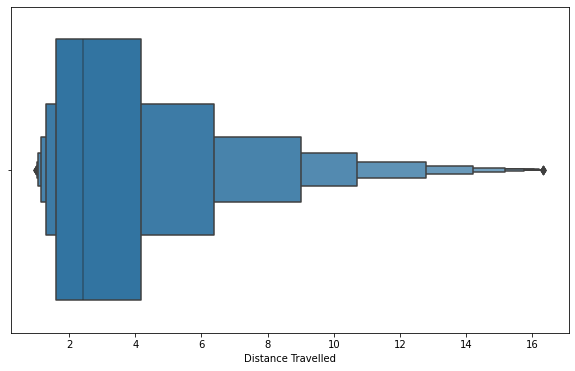

In [121]:
# Removing the outliers and updating the value
df = df[~(df.distance > 100)]
df = df[~(df.distance < 1)]

#Plotting the Boxenplot
plt.figure(figsize = (10,6))
sns.boxenplot(df.distance)
plt.xlabel('Distance Travelled')
plt.show()

# **Trip** **duration**

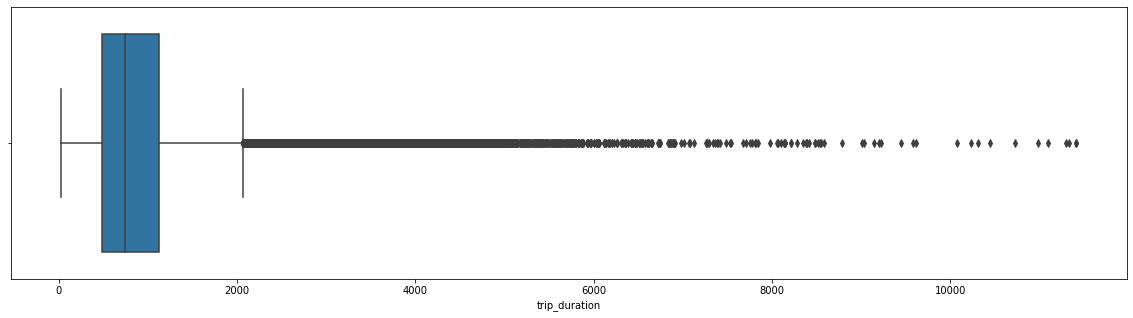

In [122]:
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_duration)
plt.show()

Some trip durations are over 100000 seconds which are clear outliers and should be removed.

In [123]:
# To maintain the data consistency, we will remove these outliers,
# (trips with duration more than 5000 seconds and less than 60 seconds) 
df = df[df.trip_duration <= 5000]
df = df[df.trip_duration >= 60]

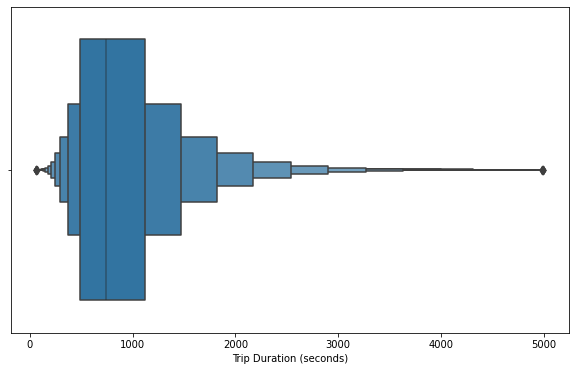

In [124]:
# Plotting for insights
plt.figure(figsize = (10,6))
sns.boxenplot(df.trip_duration)
plt.xlabel('Trip Duration (seconds)')
plt.show()

**Observation:**

Most of the trips durations took between 10-20 mins to complete. As observed most of the trips took 0 - 30 mins to complete(1800 seconds)

# **Speed**
Speed is a function of distance and time. Let's visualize speed in different trips

In [125]:
df.speed.describe()

count    1.170526e+06
mean     1.473151e+01
std      7.123271e+00
min      7.774623e-01
25%      9.764434e+00
50%      1.329671e+01
75%      1.807869e+01
max      3.566166e+02
Name: speed, dtype: float64

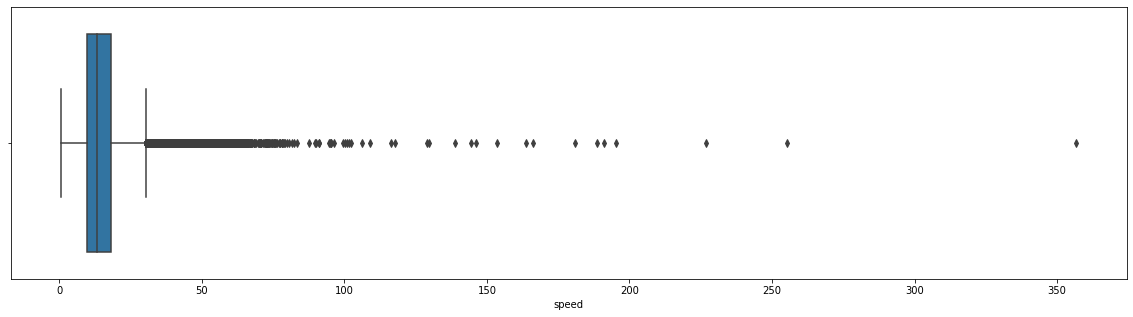

In [126]:
plt.figure(figsize = (20,5))
sns.boxplot(df.speed)
plt.show()

Many trips were done at a speed of over 200 km/h. Going SuperSonic..!!

As per the rule, the speed limit approx. **40km/h **in New York City. So having average speed of over **60km/h** is quite unreasonable.

In [127]:
# Averge speed less than 60
df = df[~(df.speed >60)]

Some observations showing that speeds which are **less than 1 km/hr** for a trip which is quite unreasonable.

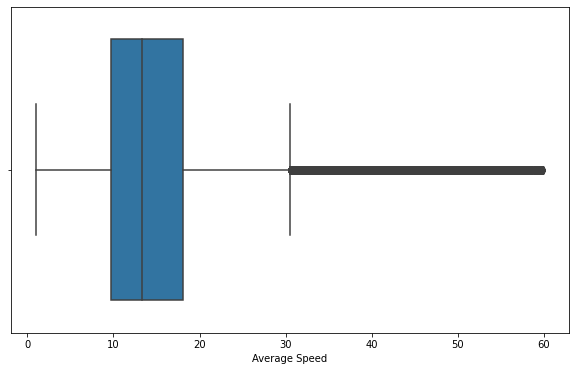

In [128]:
# Removing the data with less than avg 1km speed
df = df[~(df.speed <1)]

# Plotting of Boxplot
plt.figure(figsize = (10,6))
sns.boxplot(df.speed)
plt.xlabel('Average Speed')
plt.show()

### **Store_and_fwd_flag**
This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

In [129]:
df.vendor_id[df.store_and_fwd_flag == 1].value_counts()

1    6180
Name: vendor_id, dtype: int64

Text(0.5, 1.0, 'Store and Forward Flag')

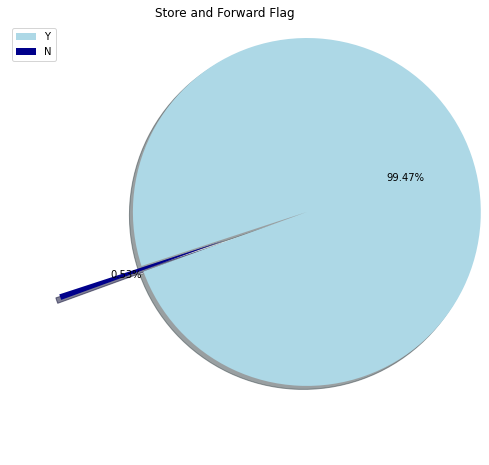

In [130]:
plt.figure(figsize=(8,8))
plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightblue', 'darkblue'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

**Observation:**

Visualization tells us that there were very few trips of which the records were stored in memory due to no connection to the server

### **Total trips Per Hour**
Let's take a look at the distribution of the pickups across the 24 hour time scale.

Text(0.5, 1.0, 'Hourly Pickups')

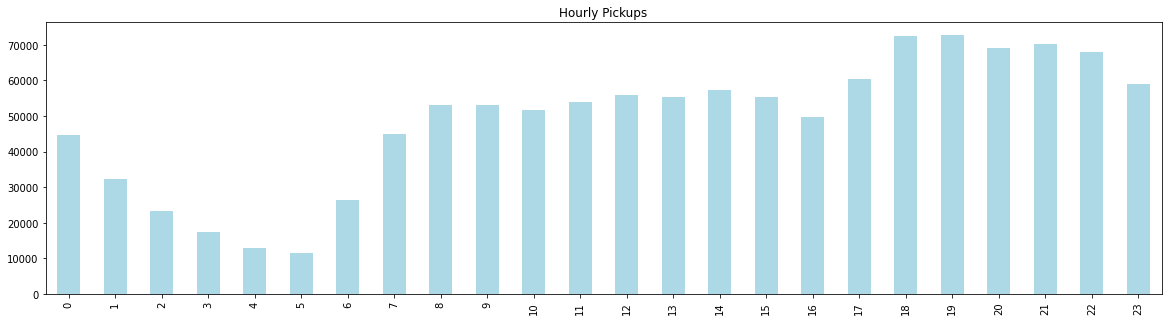

In [131]:
#Analyzing hourly pickups

plt.figure(figsize=(20,5))
pickup_hour = df['pickup_hour'].value_counts()
pickup_hour.sort_index().plot(kind='bar', color='lightblue')
plt.title("Hourly Pickups")

**In which hour we get to see maximum pickups ?** 

Rush hours (5 pm to 10 pm), probably office leaving time.

## **Total trips per weekday**
Let's take a look now at the distribution of taxi pickups across the week.

Text(0.5, 1.0, 'Overall Week day Trips')

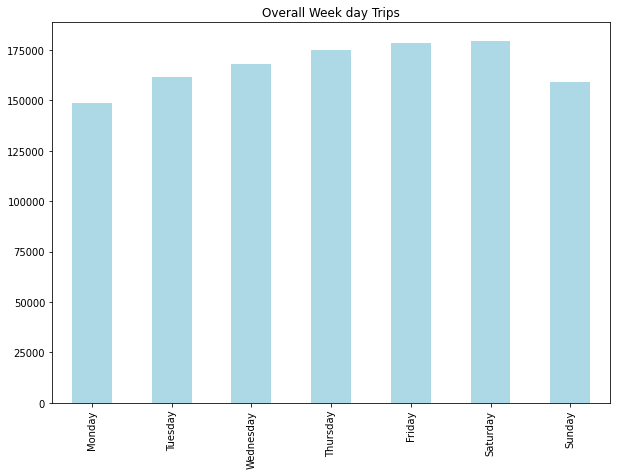

In [132]:
#Analyzing week day trips
plt.figure(figsize=(10,7))
pickup_week = df['pickup_weekday'].value_counts()
pickup_week.sort_index().plot(kind='bar', color='lightblue')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.title('Overall Week day Trips')

**Observation:**

Observations tells us that **Fridays and Saturdays** are those days in a week when New Yorkers prefer to rome in the city. GREAT !!

### **Total trips per month**
Let's take a look at the trip distribution across the months to understand if there is any diffrence in the taxi pickups in different months.

Text(0.5, 1.0, 'Overall Monthly trips')

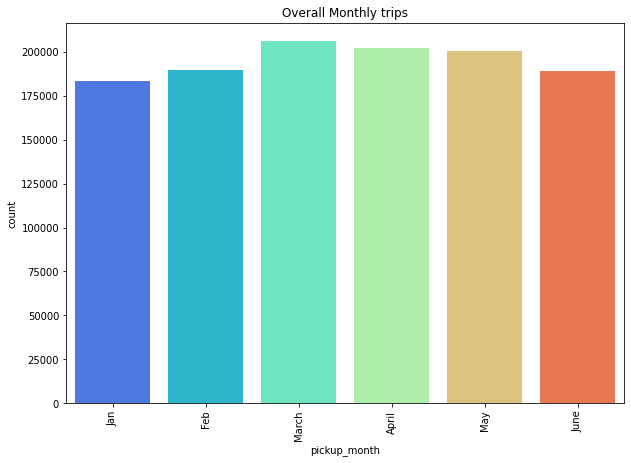

In [134]:
plt.figure(figsize=(10,7))
sns.countplot(df['pickup_month'], palette='rainbow')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'], rotation=90)
plt.title('Overall Monthly trips')

**Observation:**

-We've data of 6 months.

-Number of trips in a particular month March,April and May marking the highest.

-January being lowest probably due to extreme SnowFall NYC.

### **Trip Duration per hour**
We need to aggregate the total trip duration to plot it agaist the month. The aggregation measure can be anything like sum, mean, median or mode for the duration. Since we already did the outlier analysis, so we can take the mean to visualize the pattern which should not result in the bias of the general trend.

Lets take a look.

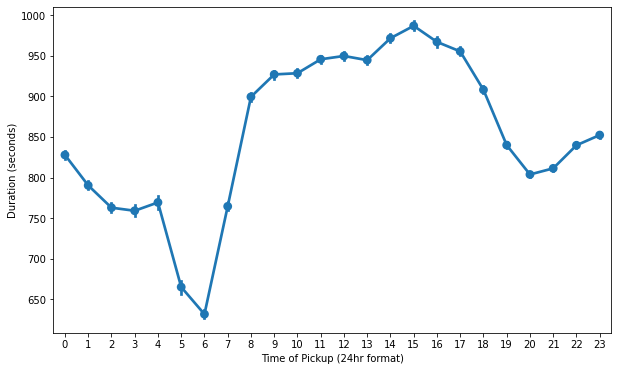

In [135]:
# Plotting for hour of pickup, trip duration
plt.figure(figsize = (10,6))
sns.pointplot(x='pickup_hour',y='trip_duration',data=df)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (seconds)')
plt.show()

**Observations:**

Average trip duration is **lowest at 6 AM** when there is minimal traffic on the roads.

Average trip duration is generally ***highest around 3 PM ***during the busy streets.

Trip duration on an average is similar during early morning hours i.e. before 6 AM & late evening hours i.e. after 6 PM.

### **Trip duration per weekday**
Let's now analyze the pattern of trip duration during the week.

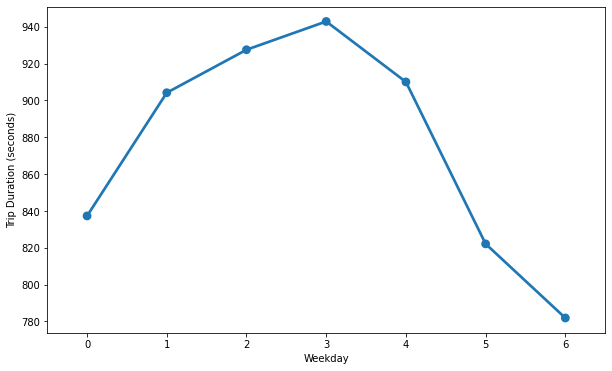

In [136]:
plt.figure(figsize = (10,6))
group2 = df.groupby('pickup_weekday').trip_duration.mean()
sns.pointplot(group2.index, group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.show()

**Observations:**

We can see that trip duration is almost equally distributed across the week on a scale of 0-1000 minutes with minimal difference in the duration times.

Also, it is observed that trip duration on thursday is longest among all days.

### **Trip duration per month**
Let's take a look at the trip duration pattern with respect to the different months.

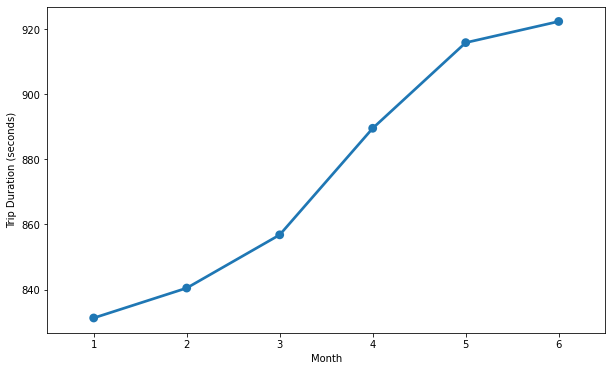

In [137]:
plt.figure(figsize = (10,6))
group3 = df.groupby('pickup_month').trip_duration.mean()
sns.pointplot(group3.index, group3.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.show()

**Observations:**

We can see an increasing trend in the average trip duration along with each subsequent month.

   


The duration difference between each month is not much. It has increased gradually over a period of 6 months.

It is lowest during february when winters starts declining.

There might be some seasonal parameters like wind/rain which can be a factor of this gradual increase in trip duration over a period. Like May is generally the considered as the wettest month in NYC and which is inline with our visualization. As it generally takes longer on the roads due to traffic jams during rainy season. So natually the trip duration would increase towards April May and June.











### **Trip duration per vendor**
We can also look at the average difference between the trip duration for each vendor. However we do know that vendor 2 has larger share of the market. Let's visualize.

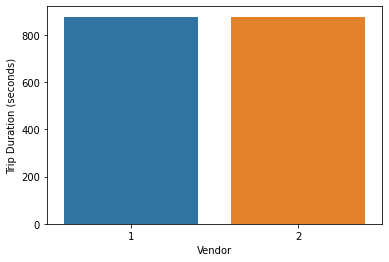

In [138]:
group4 = df.groupby('vendor_id').trip_duration.mean()
sns.barplot(group4.index, group4.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.show()

**Observations:**

Vendor 2 takes the crown. Average trip duration for vendor 2 is higher than vendor 1 by approx 200 seconds i.e. atleast 3 minutes per trip.

### **Trip duration v/s Flag**
Let's visualize if there is any effect of flag setting on the trip duration?

<Figure size 720x432 with 0 Axes>

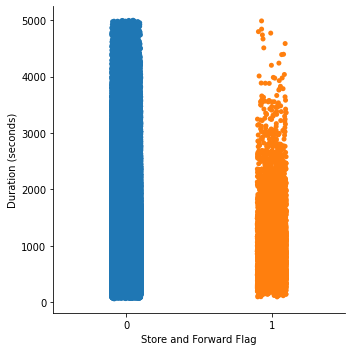

In [139]:
plt.figure(figsize = (10,6))
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df,kind='strip')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Duration (seconds)')
plt.show()

There is not much difference between **N and Y.**

### **Distance per hour**
Now, let us check how the distance is distributed against different variables. We know that trip distance must be more or less proportional to the trip duration if we ignore general traffic and other stuff on the road. Let's visualize this for each hour now.

Now, let us check how the distance is distributed against different variables. We know that trip distance must be more or less proportional to the trip duration if we ignore general traffic and other stuff on the road. Let's visualize this for each hour now.


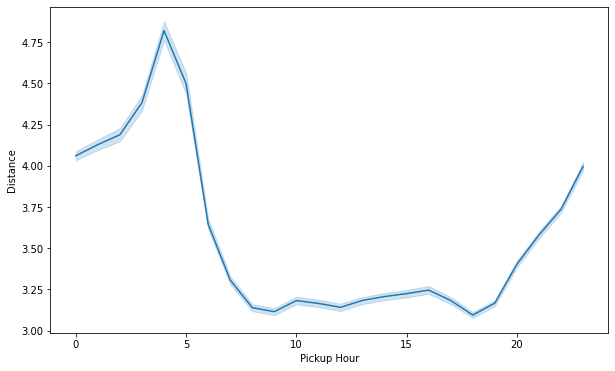

In [140]:
# plotting for distance to hour
plt.figure(figsize = (10,6))
sns.lineplot(y='distance',x='pickup_hour',data=df)
plt.ylabel('Distance')
plt.xlabel('Pickup Hour')
plt.show()

**Observations:**
- Trip distance is **highest** during **early morning hours** which can account for some things like:
  1. Outstation trips taken during the weekends.
  2.  Longer trips towards the city airport which is located in the outskirts of the city.
- Trip distance is fairly **equal** from **morning till the evening** varying around **3 - 3.5 kms**.
- It starts **increasing** gradually towards the **late night hours** starting from **evening till 5 AM** and **decrease** steeply towards **morning**.

## **Distance per Weekday**

Let's analyze the average trip distance covered on each day of the week.

**Observations:**

So it's a fairly equal distribution with average distance metric varying around **3.5 km/h** with **Sunday** being **at the top** may be due to outstation trips or night trips towards the airport.

Let's analyze the average trip distance covered on each day of the week.

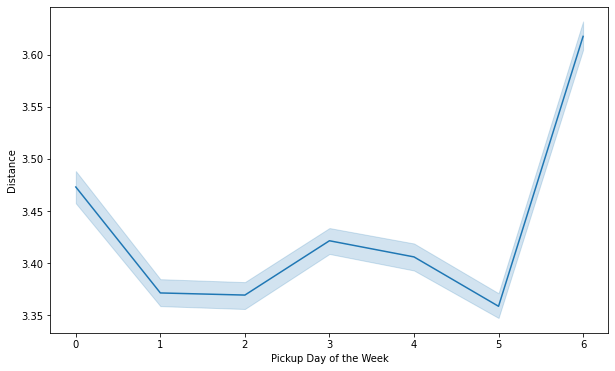

In [141]:
# Analyzing distance per weekday
plt.figure(figsize = (10,6))
sns.lineplot(x='pickup_weekday', y='distance',data=df)
plt.ylabel('Distance')
plt.xlabel('Pickup Day of the Week')
plt.show()

## **Distance per month**

Now we will look at the average trip distance covered per month.

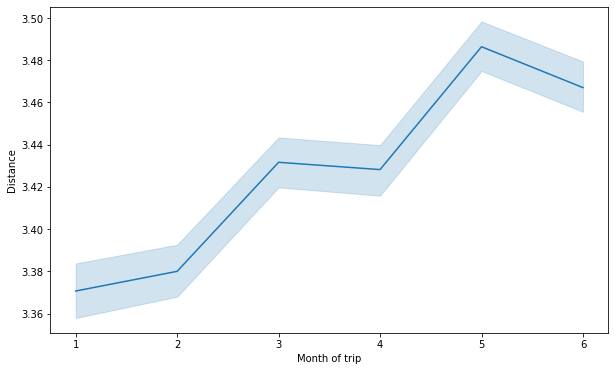

In [142]:
# Distance per month
plt.figure(figsize = (10,6))
sns.lineplot(x='pickup_month', y='distance',data=df)
plt.ylabel('Distance')
plt.xlabel('Month of trip')
plt.show()

**Observations:**

Here also the distibution is almost equivalent, varying mostly around **3.5 km/h** with **5th month** being the **highest** in the average distance and **2nd** month being the **lowest**.

## **Distance per vendor**

Let's check how both the vendors have covered the average distance during the trips

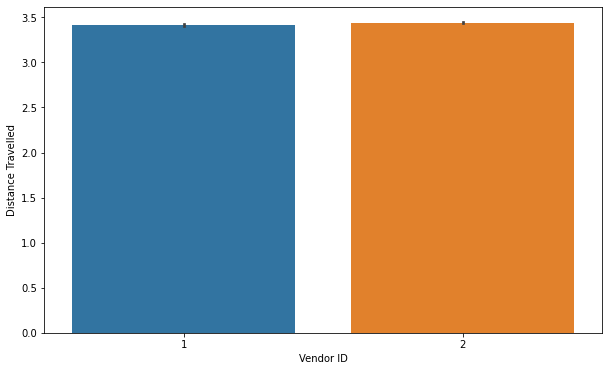

In [143]:
# Comparing distance and vendor
plt.figure(figsize = (10,6))
sns.barplot(y='distance',x='vendor_id',data=df,estimator=np.mean)
plt.ylabel('Distance Travelled')
plt.xlabel('Vendor ID')
plt.show()

**Observations:**
As shown in above, **Similar** distribution has been observed between **both the vendors**.

## **Distance and Store and Forward Flag**

<Figure size 720x432 with 0 Axes>

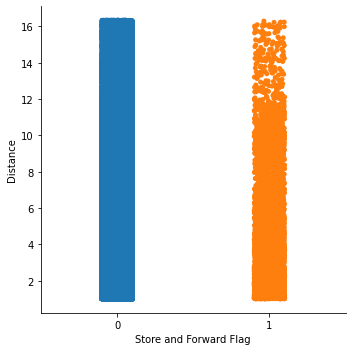

In [144]:
# Analyzing distance to store_frwd_flag
plt.figure(figsize = (10,6))
sns.catplot(y='distance',x='store_and_fwd_flag',data=df,kind='strip')
plt.ylabel('Distance')
plt.xlabel('Store and Forward Flag')
plt.show()

As **observed** for **longer distances** the trip is **not stored**.

## **Average speed per hour**

Let's look at the average speed of NYC Taxi per hour.

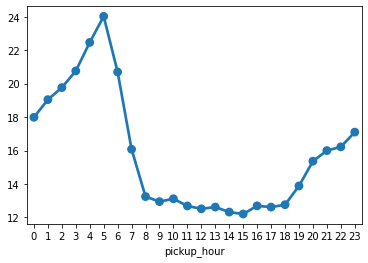

In [145]:
group9 = df.groupby('pickup_hour').speed.mean()
sns.pointplot(group9.index, group9.values)
plt.show()

**Observations:**
- The **average trend** is totally **inline** with the **normal circumstances**.
- **Average speed** tend to **increase** after **late evening** and continues to **increase** gradually till the late **early morning hours**.
- Average taxi **speed** is **highest** at **5 AM** in the morning, then it **declines** steeply as the **office hours approaches**.
- Average taxi **speed** is **more or less same** during the **office hours** i.e. from **8 AM till 6PM** in the evening

## **Average speed per weekday**

Let's visualize that on an average what is the speed of a taxi on any given weekday.

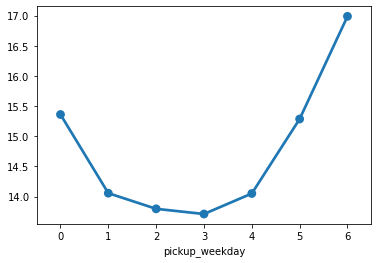

In [146]:
group10 = df.groupby('pickup_weekday').speed.mean()
sns.pointplot(group10.index, group10.values)
plt.show()

**Observations:**
- Average taxi **speed** is **higher** on **weekend** as compared to the weekdays which is obvious when there is mostly rush of office goers and business owners.
- Even on **Monday** the average taxi **speed** is shown **higher** which is quite surprising when it is one of the most busiest day after the weekend. There can be several possibility for such behaviour
   1. Lot of customers who come back from outstation in early hours of Monday before 6 AM to attend office on time.
   2. Early morning hours customers who come from the airports after vacation to attend office/business on time for the coming week.
- There could be some more reasons as well which only a local must be aware of.
- We also can't deny the anomalies in the dataset. which is quite cumbersome to spot in such a large dataset.

## **Passenger count per vendor**

Let's try some different metric in the series i.e. passenger count. We will plot it agaist the vendor only because it will not be much helpful to plot it against hour, weekday or month like others as the passenger count should be a whole number and not a ratio.

We will take mean as the aggregate measure because we already did the outlier analysis on this metric. So our results woudn't be affected by some extreme values. Also if we take median than it will return only 1 because majorty of the trips have been taken by single passenger. Let's take a look about it's distribution.

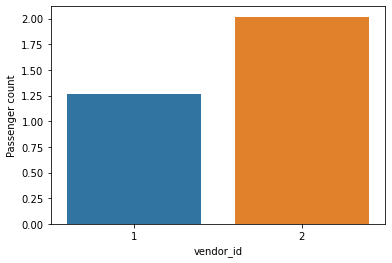

In [147]:
group9 = df.groupby('vendor_id').passenger_count.mean()
sns.barplot(group9.index, group9.values)
plt.ylabel('Passenger count')
plt.show()

Clear difference between the two operators for the average passenger count in all trips. It seems that vendor 2 trips generally consist of 2 passengers as compared to the vendor 1 with 1 passenger. Let's bifurcate it further.

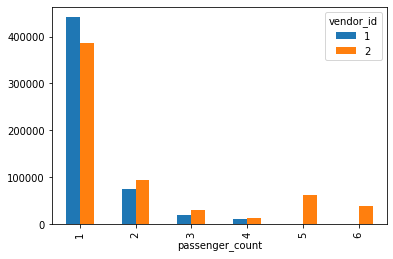

In [148]:
df.groupby('passenger_count').vendor_id.value_counts().reset_index(name='count').pivot("passenger_count","vendor_id","count").plot(kind='bar')
plt.show()

**Observations:**

It seems that most of the big cars are served by the **Vendor 2** including minivans because other than **passenger 1**, **vendor 2** has **majority** in serving **more than 1 passenger** count and that explains it greater share of the market.

Create a slots of time in a day, to determine what time of the day the ride was taken.

Creating the four slots of time:-

Morning ( 6:00 am to 11:59 pm),

Afternoon ( 12 noon to 3:59 pm),

Evening ( 4:00 pm to 9:59 pm), and

Late Night ( 10:00 pm to 5:59 am)

In [152]:
# Creating the slots of time in days
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'
        

In [153]:

# Now using above function and create new columns in the dataset.
df['PickupTime_of_day']=df['pickup_hour'].apply(time_of_day)

# Dataset description after creating new variables
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_minute,pickup_dt,pickup_week_hour,pickup_dayofyear,pickup_month,pickup_holiday,pickup_near_holiday,distance,speed,PickupTime_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,24,6369878.0,17,74,3,0,0,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,43,14085798.0,144,164,6,0,0,1.805510,9.803673,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,35,1596907.0,35,19,1,0,1,6.385108,10.822216,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,32,8364734.0,67,97,4,0,0,1.485501,12.465739,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,30,7392638.0,133,86,3,0,0,1.188590,9.836608,Afternoon


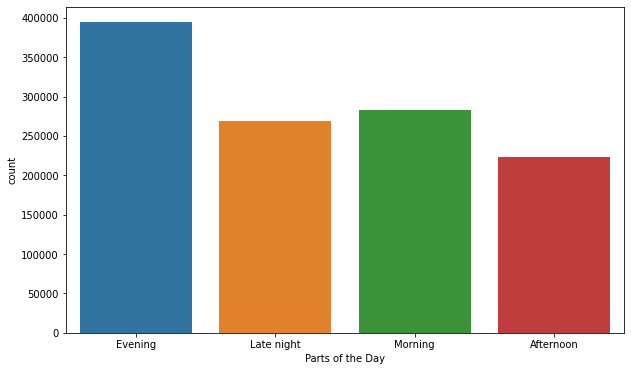

In [154]:
plt.figure(figsize = (10,6))
sns.countplot(df.PickupTime_of_day)
plt.xlabel('Parts of the Day')
plt.show()

### **Regression** **Analysis-**

Principal Component Analysis (PCA)

Splitting Data & Choosing Algorithms

Linear Regression Implementation

Decision Tree Implementation

Random Forest Implementation
Evaluating Metrics (R2 and RMSLE)





# **Why Linear Regression , Decision Tree and Random Forest ?**
# **Linear regression:**
Simpl
e to explain.

Model training and prediction are fast.

No tuning is required except regularization.

# **Decision Tree:** 
Decision trees are very intuitive and easy to explain.

They follow the same pattern of thinking that humans use when making decisions.

Decision trees are a common-sense technique to find the best solutions to problems with uncertainty.

# **Random Forest:**
It is one of the most accurate learning algorithms available.

Random Forest consits of multiple Decision Tress - 

Results from multiple trees are then merged to give best possible final outcome.

Random forests overcome several problems with decision trees like Reduction in overfitting.

In [155]:
# Checking numerical features
features= df.describe().columns
features= list(features)
features= features[:-1]
features

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'direction',
 'distance_haversine',
 'distance_manhattan',
 'dropoff_hour',
 'dropoff_weekday',
 'dropoff_month',
 'pickup_weekday',
 'pickup_weekofyear',
 'pickup_hour',
 'pickup_minute',
 'pickup_dt',
 'pickup_week_hour',
 'pickup_dayofyear',
 'pickup_month',
 'pickup_holiday',
 'pickup_near_holiday',
 'distance']

In [175]:
# Removing the variables, which are not necessary for further analysis
data=df.drop(['pickup_dt','store_and_fwd_flag','pickup_weekday','dropoff_weekday', 'trip_duration'], axis=1)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_dt,pickup_week_hour,pickup_dayofyear,pickup_month,pickup_holiday,pickup_near_holiday,distance,speed,PickupTime_of_day,trip_duration_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,6369878.0,17,74,3,0,0,1.498523,11.856445,Evening,0.126389
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,14085798.0,144,164,6,0,0,1.805510,9.803673,Late night,0.184167
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,1596907.0,35,19,1,0,1,6.385108,10.822216,Morning,0.590000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,8364734.0,67,97,4,0,0,1.485501,12.465739,Evening,0.119167
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,7392638.0,133,86,3,0,0,1.188590,9.836608,Afternoon,0.120833


### **Heatmap:**

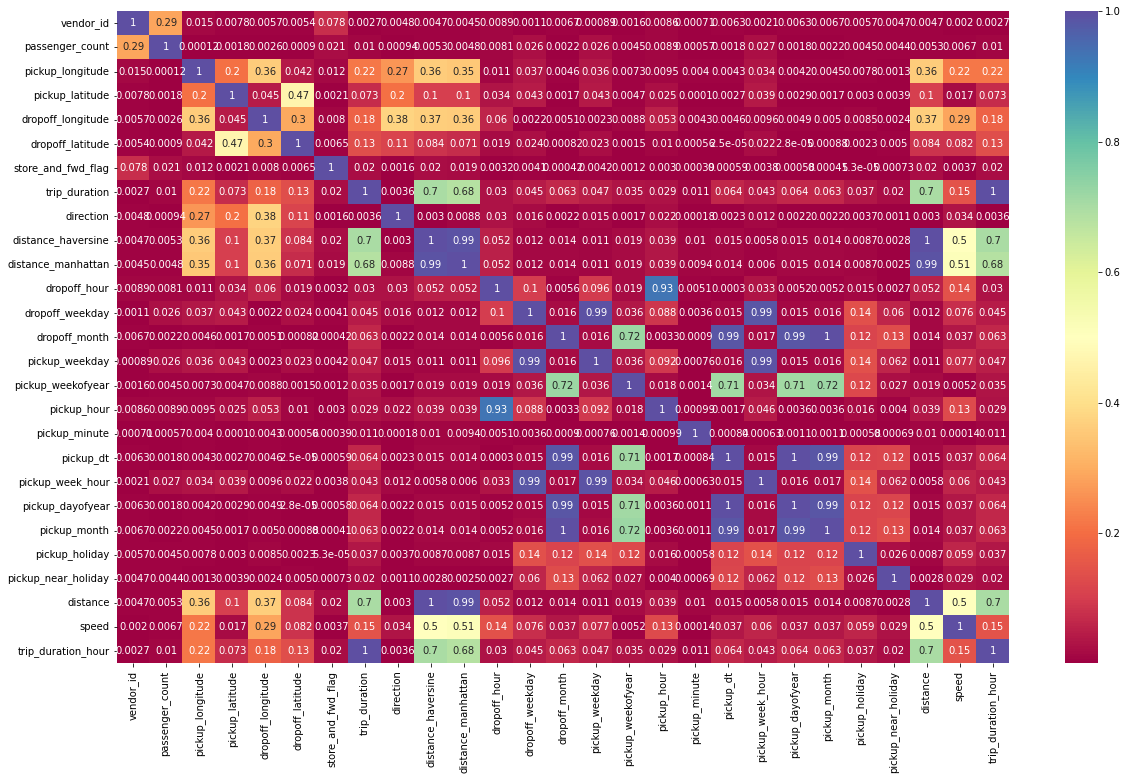

In [185]:
# Correalation analysis using heatmap
plt.figure (figsize= (20,12))
corelation= df.corr()
sns.heatmap(abs(corelation), annot=True, cmap='Spectral')

# **Splitting Data and Choosing Algorithms**

In [186]:
# Since, The dataset is having more rows,lets select some portion of it for the Training purpose.
from scipy.stats import zscore
#Train test split
X = df[features].apply(zscore)[:]
y=df['trip_duration_hour'][:]

In [176]:
len(features)

25

In [159]:
# train_test_split imported using sklearn library
from sklearn.model_selection import train_test_split

# data set splitted into 75-25 for training and testing purpose respectively,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [187]:
# checking Shape of data set splitted into 75-25,
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(819191, 25) (819191,)
(351082, 25) (351082,)


# **Linear regression:**
Simple to explain.

Model training and prediction are fast.

No tuning is required except regularization.

In [178]:
#implementing Linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([0.26222222, 0.185     , 0.185     , ..., 0.09944444, 0.21333333,
       0.33916667])

In [179]:
#coeficients & intercept

est_lr.intercept_, est_lr.coef_

(0.24347648986366624,
 array([-1.35408454e-17, -3.27429056e-17,  1.54715416e-16,  4.41964758e-16,
        -2.77665917e-17, -4.65699304e-16,  1.13034267e-17,  1.51701968e-01,
         3.88973795e-16, -2.07688800e-06, -1.39180448e-16, -4.66067224e-18,
         4.23577920e-18,  5.32573496e-18, -5.84420880e-03,  4.11005451e-18,
        -8.08044202e-04, -4.06745221e-18,  7.44252919e-14,  5.82571180e-03,
        -7.45120586e-14,  5.97971379e-17,  6.54112723e-17,  4.63953827e-17,
         2.07688800e-06]))

# **Evaluation**

In [180]:
# Importing required metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Text(0.5, 1.0, 'Test VS Prediction')

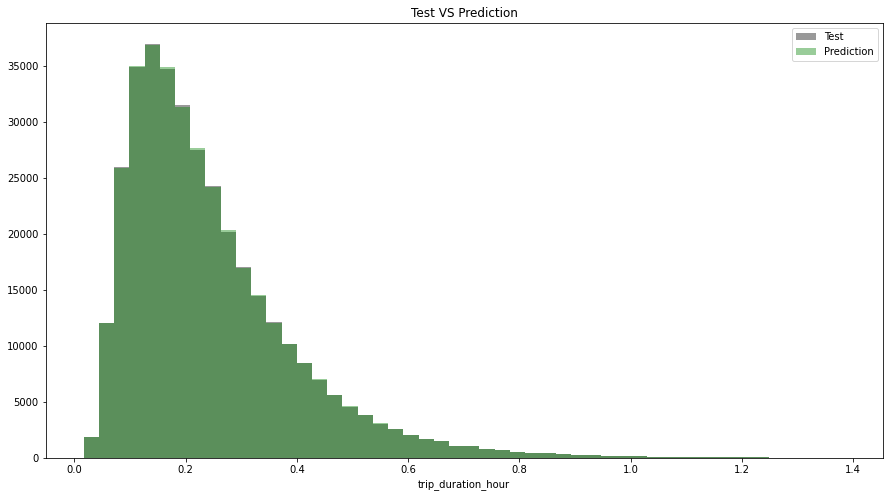

In [181]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

In [182]:
#null rmsle implementation

y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
print ("Null RMSLE : ", np.sqrt((y_test, y_null)))

Null RMSLE :  [[0.51207638 0.43011626 0.43011626 ... 0.31534813 0.46188022 0.58238017]
 [0.49394304 0.49394304 0.49394304 ... 0.49394304 0.49394304 0.49394304]]


# **Decision Tree:**
Decision trees are very intuitive and easy to explain.

They follow the same pattern of thinking that humans use when making decisions.

Decision trees are a common-sense technique to find the best solutions to problems with uncertainty.

In [183]:
#implementation of decision tree

from sklearn.tree import DecisionTreeRegressor

est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

array([0.26222222, 0.185     , 0.185     , ..., 0.09931067, 0.21319455,
       0.33888918])

In [167]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((819191, 25), (351082, 25), (819191,), (351082,))

In [169]:
#null rmsle implementation

y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
print ("Null RMSLE : ", np.sqrt(mean_squared_log_error(y_test, y_null)))

Null RMSLE :  0.11385282169176082


# **Random Forest:**
It is one of the most accurate learning algorithms available.

Random Forest consits of multiple Decision Tress -

Results from multiple trees are then merged to give best possible final outcome.

Random forests overcome several problems with decision trees like Reduction in overfitting.

In [189]:
#random forest implementation

from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred

array([0.26222095, 0.1848974 , 0.1848974 , ..., 0.09941668, 0.21336536,
       0.33914592])

In [190]:
#examining metrics 

print ("Training Score : " , est_rf.score(X_train, y_train))

print ("Validation Score : ", est_rf.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_rf, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(rf_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.9999995238299014
Validation Score :  0.9999994952271175
Cross Validation Score :  0.9999994335898197
R2_Score :  0.9999994952282872
RMSLE :  7.741144769111441e-05


Text(0.5, 1.0, 'Test VS Prediction')

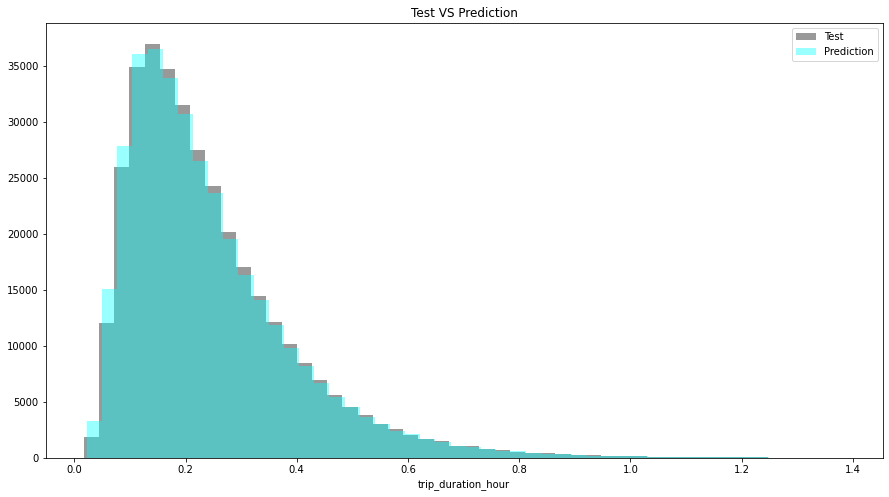

In [205]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

From the above Viz. we can clearly identify that the Random Forest Algorithm is also performing good. The Actual Data (in Grey) and Predicted values (in Green) are as close as possible. We can conclude that Random Forest could be a good choice for Trip duration prediction.
Similarly, we can Hyper tune Random Forest to get the most out of it.

Text(0.5, 1.0, 'R2 Scores')

<Figure size 720x504 with 0 Axes>

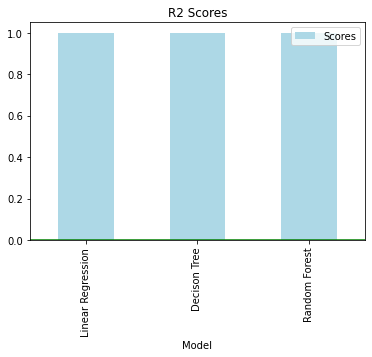

In [214]:
#r2 score plot for all 3 models

plt.figure(figsize=(10,7))
r2 = pd.DataFrame({'Scores':np.array([r2_score(lr_pred, y_test), r2_score(dt_pred, y_test), r2_score(rf_pred, y_test)]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="lightblue")
plt.axhline(y=0, color='g')
plt.title("R2 Scores")

# **What's better - Decision Tree or Random Forest ?**
One problem that might occur with Decision Tree is that it can overfit.

Difference is - A random forest is a collection of decision trees.

A decision tree model considers all the features which makes it memorize everything, it gets overfitted on training data which couldn't predict well on unseen data.

A random forest chooses few number of rows at random and interprets results from all the Tress and combines it to get more accurate and stable final result.

### **Insights:**

Observed which taxi service provider is most Frequently used by New Yorkers.


Found out few trips which were of duration 528 Hours to 972 Hours, possibly Outliers.

Also, found out some Trips of which pickup / dropoff point ended up somewhere in North Atlantic Sea.

Passenger count Analysis showed us that there were few trips with Zero Passengers so possible that trip is not successfully done.
